<a href="https://colab.research.google.com/github/afif-af/ml_pytorch_scikitlearn/blob/main/Chapter03ml_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
x=iris.data[:,[2,3]]
y=iris.target

In [37]:
print('class labels:', np.unique(y))

class labels: [0 1 2]


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,
                                               random_state=1, stratify=y)

In [39]:
print('Labels counts in y:',np.bincount(y))
print('Labels counts in y_train:',np.bincount(y_train))
print('Labels counts in y_test:',np.bincount(y_test)
)

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

In [41]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(eta0=0.1, random_state=1)
ppn.fit(x_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [42]:
y_pred=ppn.predict(x_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [43]:
from sklearn.metrics import accuracy_score
print('Accuracy : %.3f' % accuracy_score(y_test, y_pred))

Accuracy : 0.978


In [44]:
print('Accuracy: %3.f' % ppn.score( x_test_std,y_test))

Accuracy:   1


In [45]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [46]:
def plot_decision_regions(x, y, classifier, test_idx=None,
                          resolution=0.02):
  markers=('o','s','^','v','<')
  colors=('red','blue','lightgreen','gray','cyan')
  cmap=ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = x[:,0].min() - 1 , x[:,0].max() + 1
  x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx1, xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                       np.arange(x2_min,x2_max,resolution))
  lab=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab=lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y==cl, 0],
                y=x[y==cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'class {cl}',
                edgecolors='black')

    if test_idx:
      x_test, y_test=x[test_idx,:],y[test_idx]
      plt.scatter(x_test[:,0], x_test[:,1],
                  c='none', edgecolors='black', alpha=1.0,
                  linewidths=1, marker='o',
                  s=100,label='Test set')

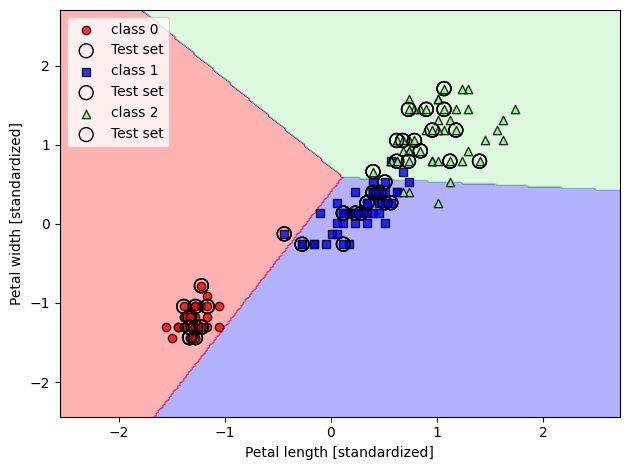

In [47]:
x_combined_std=np.vstack((x_train_std, x_test_std))
y_combined=np.hstack((y_train, y_test))
plot_decision_regions(x=x_combined_std,
                      y=y_combined,
                      classifier=ppn,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [48]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
  return 1.0/(1.0+np.exp(-z))

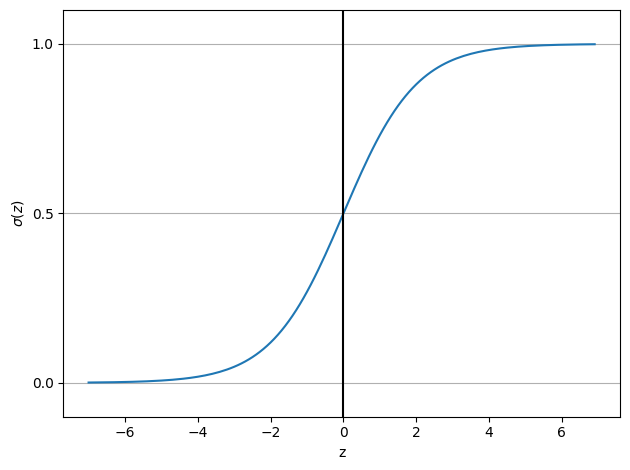

In [51]:
z=np.arange(-7,7,0.1)
sigma_z=sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca ()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()